In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('daily-min-temperatures.csv')
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [ ]:
df.set_index('Date',inplace = True)

In [ ]:
df.head(5)

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [ ]:
date_range = pd.date_range(start = '1/1/1981',end = '1/31/1981',freq = 'D')
date_range

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10', '1981-01-11', '1981-01-12',
               '1981-01-13', '1981-01-14', '1981-01-15', '1981-01-16',
               '1981-01-17', '1981-01-18', '1981-01-19', '1981-01-20',
               '1981-01-21', '1981-01-22', '1981-01-23', '1981-01-24',
               '1981-01-25', '1981-01-26', '1981-01-27', '1981-01-28',
               '1981-01-29', '1981-01-30', '1981-01-31'],
              dtype='datetime64[ns]', freq='D')

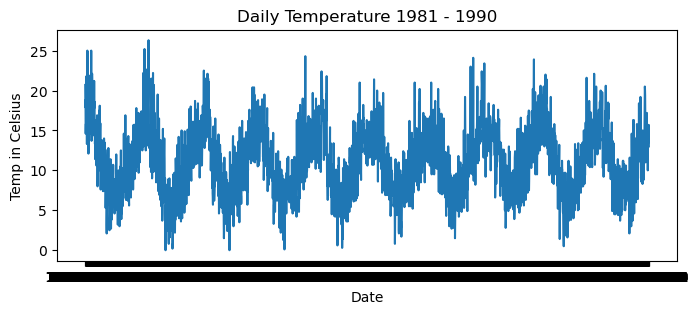

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(df.index,df['Temp'])
plt.title('Daily Temperature 1981 - 1990')
plt.xlabel('Date')
plt.ylabel('Temp in Celsius')
plt.show()

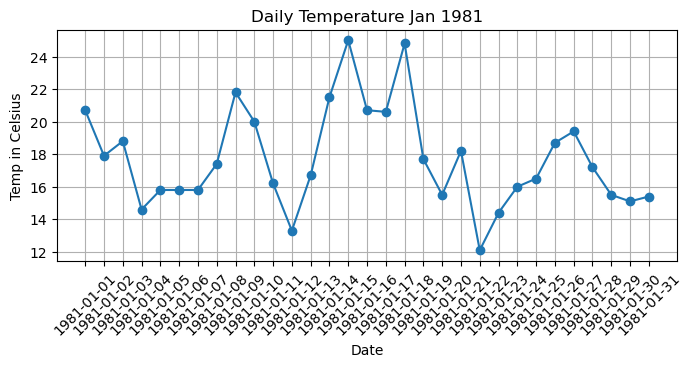

In [ ]:
filtered_df = df.loc['1981-01-01':'1981-01-31']
plt.figure(figsize=(8, 3))
plt.plot(filtered_df.index, filtered_df['Temp'], marker='o')
plt.title('Daily Temperature Jan 1981')
plt.xlabel('Date')
plt.ylabel('Temp in Celsius')
plt.xticks(rotation=45)
plt.grid()
plt.show()


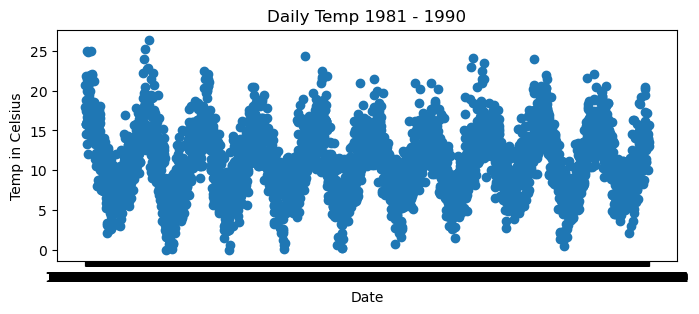

In [ ]:
plt.figure(figsize=(8,3 ))
plt.scatter(df.index,df['Temp'])
plt.title('Daily Temp 1981 - 1990')
plt.xlabel('Date')
plt.ylabel('Temp in Celsius')
plt.show()

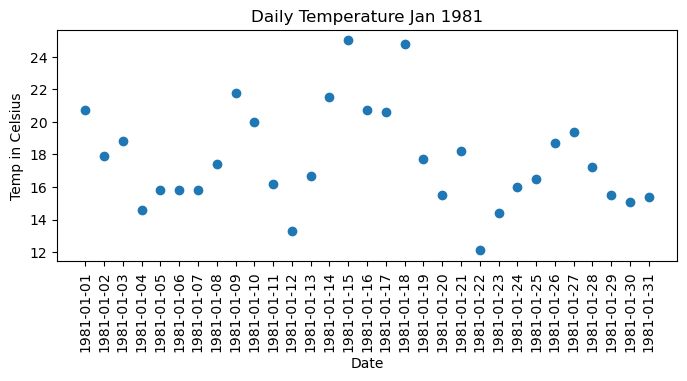

In [ ]:
plt.figure(figsize=(8,3 ))
plt.scatter(filtered_df.index,filtered_df['Temp'])
plt.title('Daily Temperature Jan 1981')
plt.xlabel('Date')
plt.ylabel('Temp in Celsius')
plt.xticks(rotation=90)
plt.show()

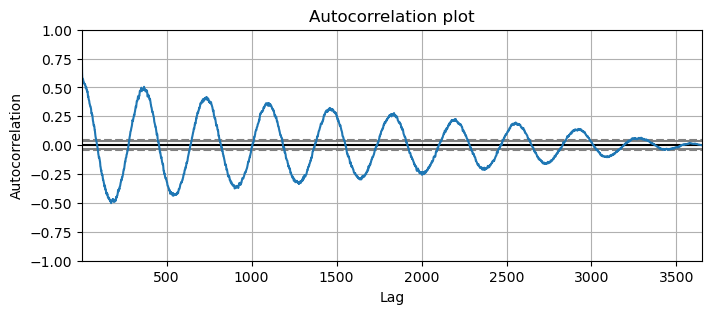

In [ ]:
plt.figure(figsize=(8,3 ))
pd.plotting.autocorrelation_plot(df['Temp'])
plt.title('Autocorrelation plot')
plt.show()

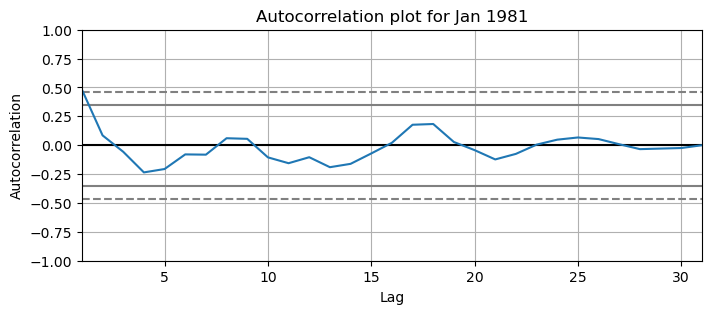

In [ ]:
plt.figure(figsize=(8,3 ))
pd.plotting.autocorrelation_plot(filtered_df['Temp'])
plt.title('Autocorrelation plot for Jan 1981')
plt.show()

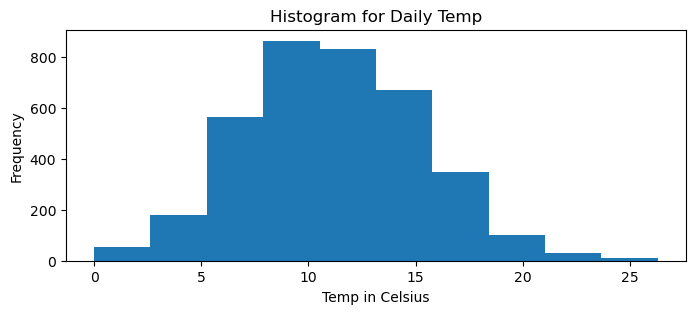

In [ ]:
plt.figure(figsize=(8,3 ))
plt.hist(df['Temp'],bins=10)
plt.title('Histogram for Daily Temp')
plt.ylabel('Frequency')
plt.xlabel('Temp in Celsius')
plt.show()

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


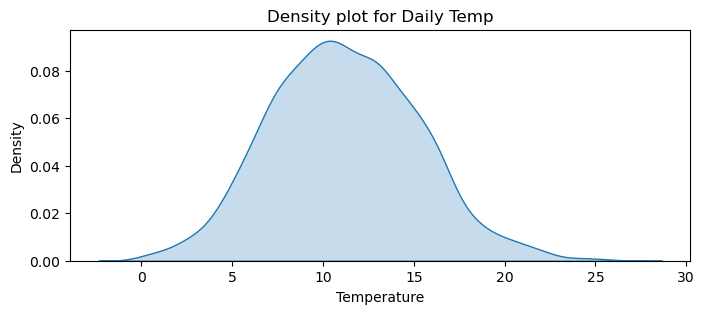

In [ ]:
plt.figure(figsize=(8,3 ))
sns.kdeplot(df['Temp'],fill=True)
plt.title('Density plot for Daily Temp')
plt.xlabel('Temperature')
plt.show()

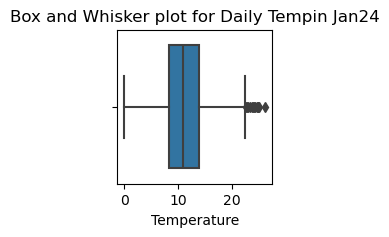

In [ ]:
plt.figure(figsize=(2,2))
sns.boxplot(x=df['Temp'])
plt.title('Box and Whisker plot for Daily Tempin Jan24')
plt.xlabel('Temperature')
plt.show()

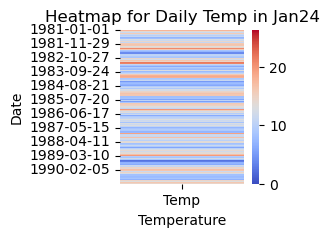

In [ ]:
plt.figure(figsize=(2,2))
sns.heatmap(df,cmap='coolwarm')
plt.title('Heatmap for Daily Temp in Jan24')
plt.xlabel('Temperature')
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

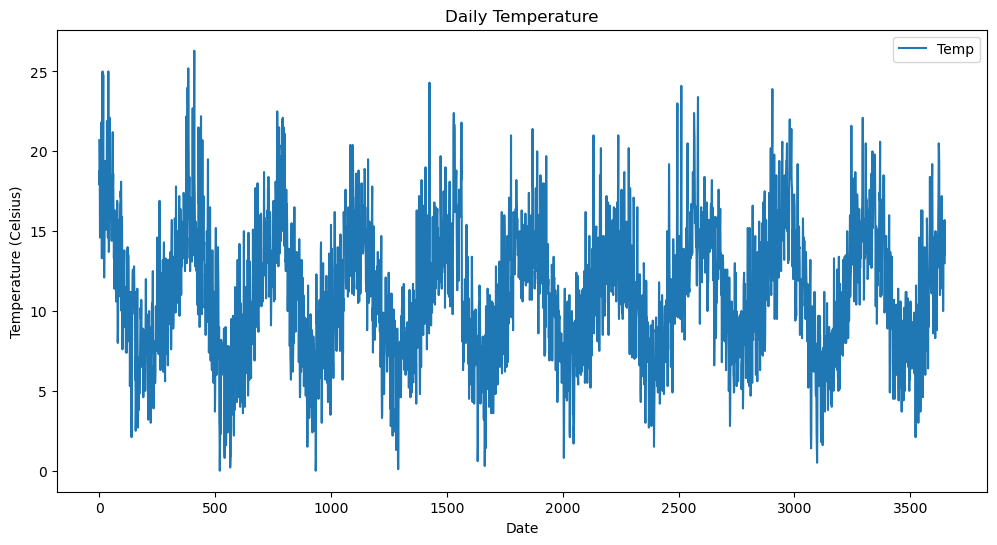

In [ ]:
df.plot(figsize=(12, 6))
plt.title('Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.show()

In [ ]:
result = adfuller(df['Temp'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -4.4448049246116925
p-value: 0.000247082630036107


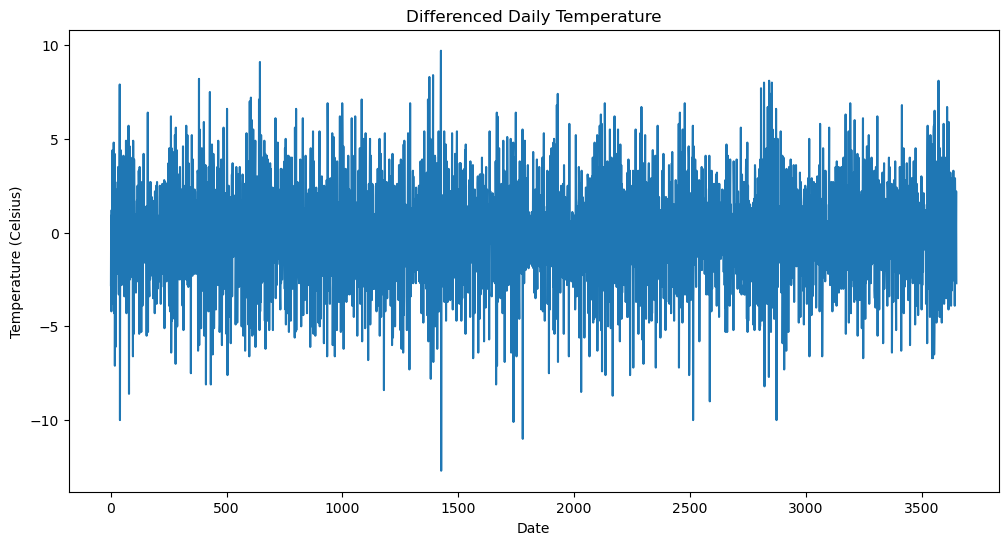

In [ ]:
df['Temp_diff'] = df['Temp'] - df['Temp'].shift(1)
df['Temp_diff'].dropna().plot(figsize=(12, 6))
plt.title('Differenced Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.show()

In [ ]:
model = ARIMA(df['Temp'], order=(1, 0, 1))
fit = model.fit()
print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                 3650
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -8605.425
Date:                Fri, 24 Jan 2025   AIC                          17218.851
Time:                        10:08:20   BIC                          17243.661
Sample:                             0   HQIC                         17227.686
                               - 3650                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1965      0.240     46.721      0.000      10.727      11.666
ar.L1          0.8649      0.011     81.948      0.000       0.844       0.886
ma.L1         -0.2414      0.019    -12.604      0.0

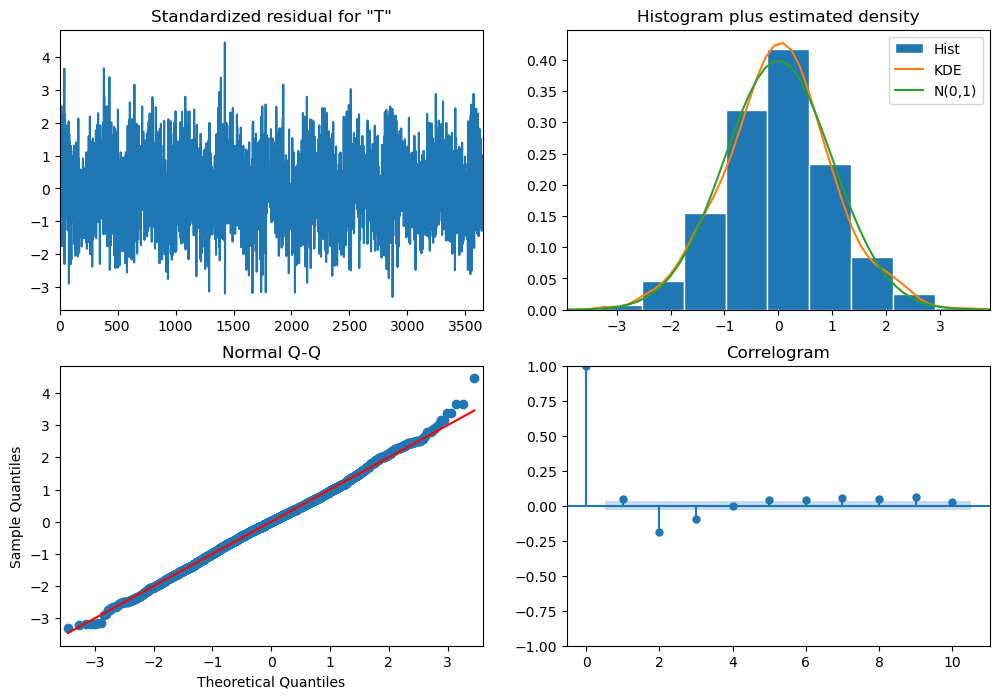

In [ ]:
fit.plot_diagnostics(figsize=(12, 8))
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(df['Temp'], lags=1)
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                   Temp   No. Observations:                 3650
Model:                     AutoReg(1)   Log Likelihood               -8624.803
Method:               Conditional MLE   S.D. of innovations              2.572
Date:                Fri, 24 Jan 2025   AIC                          17255.605
Time:                        10:11:13   BIC                          17274.212
Sample:                             1   HQIC                         17262.231
                                 3650                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5205      0.124     20.262      0.000       2.277       2.764
Temp.L1        0.7743      0.010     74.048      0.000       0.754       0.795
                                    Roots           

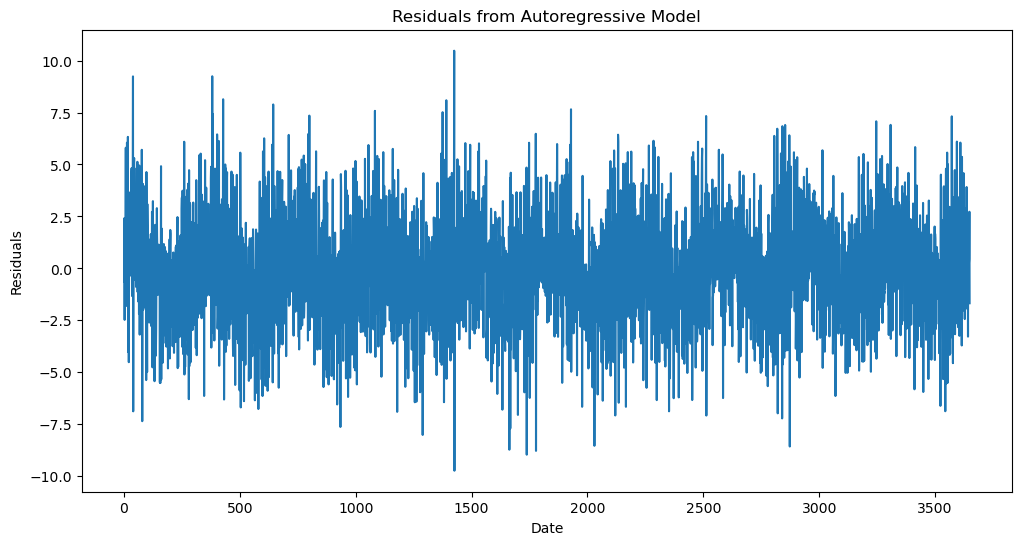

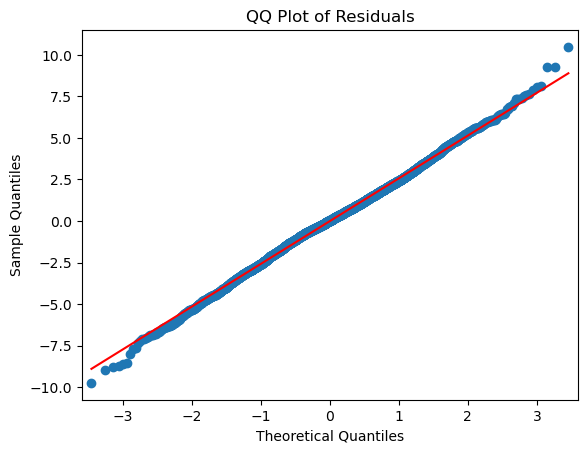

In [ ]:
residuals = model_fit.resid

plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals from Autoregressive Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Plot diagnostics
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()